In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import re
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 

In [2]:
df=pd.read_csv("nyc_taxis_weather_jantoaug19s.csv")
df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,RatecodeID,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,...,date,maxtemp,mintemp,avetemp,departuretemp,hdd,cdd,precipitation,newsnow,snowdepth
0,2019-01-17 18:30:40,2019-01-17 18:35:20,162,233,1.0,0.0,1.0,5.0,0.3,0.5,...,1/17/19,33.0,24.0,28.5,-3.7,36.0,0.0,0.00,0.0,0.0
1,2019-01-07 20:45:41,2019-01-07 21:10:25,186,75,1.0,0.0,0.5,19.5,0.3,0.5,...,1/7/19,34.0,25.0,29.5,-3.2,35.0,0.0,0.00,0.0,0.0
2,2019-01-29 10:00:49,2019-01-29 10:07:37,236,237,1.0,0.0,0.0,6.0,0.3,0.5,...,1/29/19,43.0,25.0,34.0,1.1,31.0,0.0,0.23,0.0,0.0
3,2019-01-10 05:54:57,2019-01-10 06:12:44,211,138,1.0,0.0,0.5,29.0,0.3,0.5,...,1/10/19,34.0,28.0,31.0,-1.4,34.0,0.0,0.00,0.0,0.0
4,2019-01-24 08:59:00,2019-01-24 09:12:27,233,170,1.0,0.0,0.0,9.0,0.3,0.5,...,1/24/19,59.0,35.0,47.0,14.5,18.0,0.0,1.33,0.0,0.0


In [3]:
df["pickup_datetime"]=pd.to_datetime(df['pickup_datetime'])
df["dropoff_datetime"]=pd.to_datetime(df['dropoff_datetime'])
df["date"]=pd.to_datetime(df['date'])

In [4]:
df.describe()

,PULocationID,DOLocationID,RatecodeID,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,...,trip_duration_mins,maxtemp,mintemp,avetemp,departuretemp,hdd,cdd,precipitation,newsnow,snowdepth
count,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,...,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000
mean,162.710837,161.253165,1.052756,1.972424,1.069523,13.068938,0.299957,0.498031,1.571951,1.284299,...,17.901480,62.709468,48.408401,55.558935,0.568466,13.058108,3.868634,0.154170,0.059396,0.074644
std,65.930485,70.204930,0.669901,1.020099,1.237576,11.634544,0.003578,0.031317,1.223892,0.465248,...,71.228883,19.321813,18.013049,18.503470,6.782948,14.374985,5.924168,0.315305,0.374366,0.418558
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,14.000000,2.000000,9.000000,-24.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.000000,107.000000,1.000000,2.500000,0.000000,6.500000,0.300000,0.500000,1.000000,1.000000,...,6.680000,46.000000,34.000000,40.500000,-3.400000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,162.000000,162.000000,1.000000,2.500000,0.500000,9.500000,0.300000,0.500000,1.000000,1.000000,...,11.130000,66.000000,50.000000,56.500000,0.900000,8.000000,0.000000,0.000000,0.000000,0.000000
75%,233.000000,233.000000,1.000000,2.500000,2.500000,14.500000,0.300000,0.500000,2.000000,2.000000,...,18.200000,80.000000,65.000000,72.000000,4.600000,24.000000,7.000000,0.100000,0.000000,0.000000
max,265.000000,265.000000,99.000000,2.500000,17.500000,314.000000,0.300000,0.500000,6.000000,4.000000,...,1439.020000,95.000000,82.000000,88.500000,20.800000,56.000000,24.000000,1.820000,4.000000,4.000000


In [5]:
df.dtypes

pickup_datetime          datetime64[ns]
dropoff_datetime         datetime64[ns]
PULocationID                      int64
DOLocationID                      int64
RatecodeID                      float64
congestion_surcharge            float64
extra                           float64
fare_amount                     float64
improvement_surcharge           float64
mta_tax                         float64
passenger_count                 float64
payment_type                    float64
store_and_fwd_flag               object
tip_amount                      float64
tolls_amount                    float64
total_amount                    float64
trip_distance                   float64
pickup_dayofweek                  int64
trip_duration_mins              float64
date                     datetime64[ns]
maxtemp                         float64
mintemp                         float64
avetemp                         float64
departuretemp                   float64
hdd                             float64


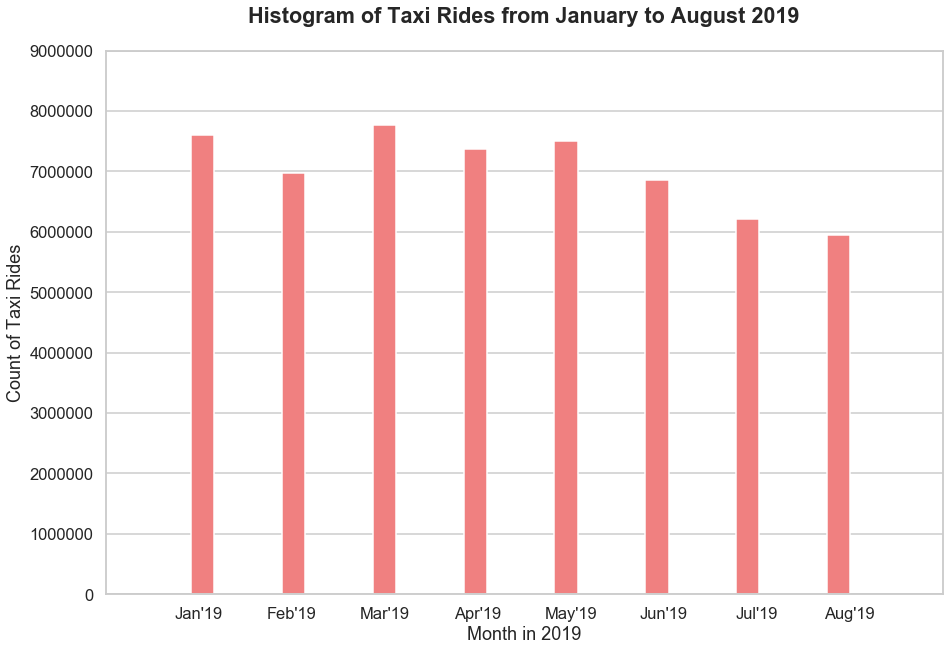

In [6]:
plt.figure(figsize=(15,10))
sns.set(context="talk", style="whitegrid", palette="bright")
g=sns.distplot(df["pickup_datetime"].dt.month, kde=False, hist_kws={"width":0.25,"align":"left","color":"lightcoral", 'alpha': 1})
g.xaxis.grid(b=False)
plt.xlim(0,9)
g.set_xticklabels(["","Jan'19","Feb'19","Mar'19","Apr'19","May'19","Jun'19","Jul'19","Aug'19"])
plt.yticks(g.get_yticks(), (g.get_yticks() * 1/0.002).astype(int))
plt.xlabel("Month in 2019")
plt.ylabel("Count of Taxi Rides")
plt.title("Histogram of Taxi Rides from January to August 2019", fontweight="bold", fontsize="large", y=1.04)
plt.show()

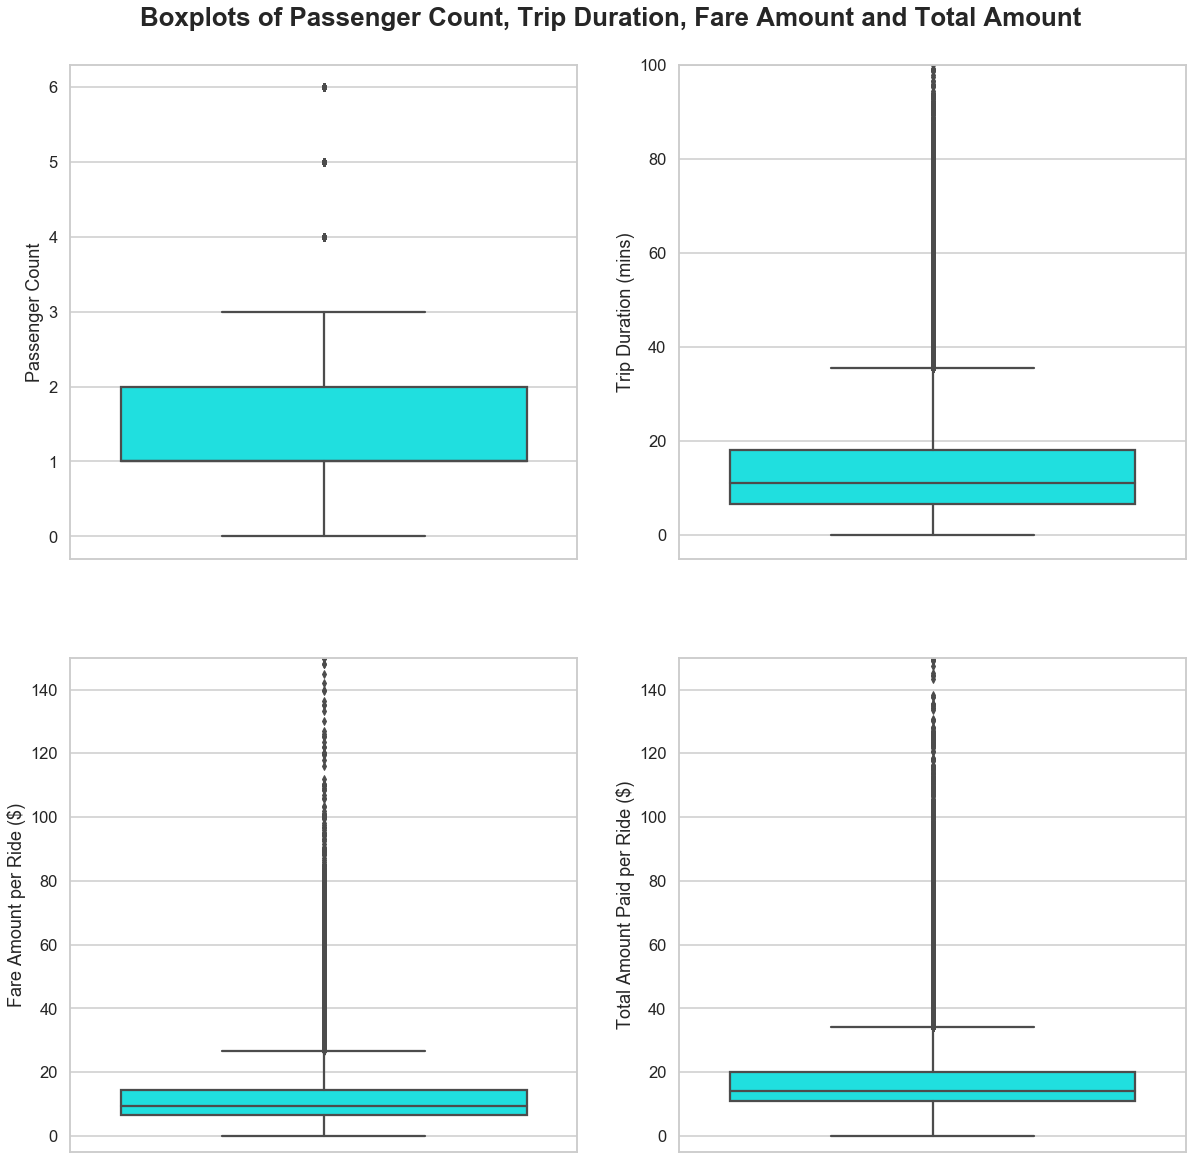

In [7]:
fig,axes=plt.subplots(2,2, figsize=(20,20))

a=sns.boxplot(y=df['passenger_count'], ax=axes[0,0],color="cyan").set(ylabel='Passenger Count')

sns.boxplot(y=df['trip_duration_mins'], ax=axes[0,1],color="cyan").set(ylabel='Trip Duration (mins)')
axes[0,1].set(ylim=(-5, 100))


sns.boxplot(y=df['fare_amount'], ax=axes[1,0],color="cyan").set(ylabel='Fare Amount per Ride ($)')
axes[1,0].set(ylim=(-5, 150))

sns.boxplot(y=df['total_amount'], ax=axes[1,1],color="cyan").set(ylabel='Total Amount Paid per Ride ($)')
axes[1,1].set(ylim=(-5, 150))

fig.suptitle('Boxplots of Passenger Count, Trip Duration, Fare Amount and Total Amount', fontsize="x-large", fontweight="bold", y=0.92)
plt.show()

# How is Taxi Ridership Correlated with Weather?

In [8]:
trip_count_by_date_df = df.groupby("date")["pickup_datetime"].count()
trip_count_by_date_df = trip_count_by_date_df.to_frame(name="trip_count")
trip_count_by_date_df.reset_index(inplace=True)
trip_count_weather_by_date_df = trip_count_by_date_df.merge(df[["date","precipitation","newsnow","maxtemp","avetemp"]], how="inner", on="date")
trip_count_weather_by_date_df = trip_count_weather_by_date_df.groupby("date").first()
trip_count_weather_by_date_df.head()

,trip_count,precipitation,newsnow,maxtemp,avetemp
date,,,,,
2019-01-01,365,0.06,0.0,58.0,48.5
2019-01-02,374,0.00,0.0,40.0,37.5
2019-01-03,456,0.00,0.0,44.0,40.5
2019-01-04,460,0.00,0.0,47.0,41.0
2019-01-05,472,0.50,0.0,47.0,44.0


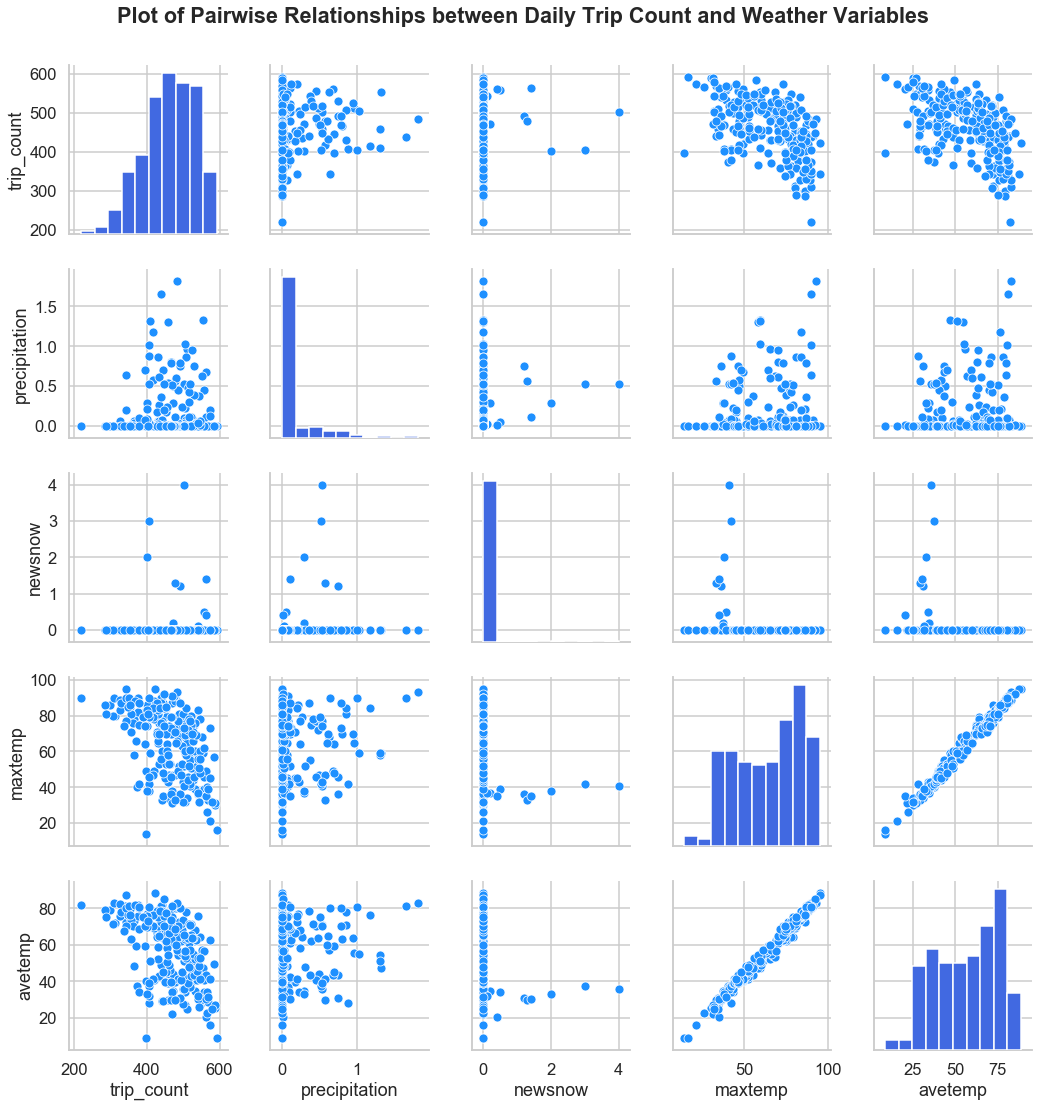

In [9]:
g=sns.pairplot(trip_count_weather_by_date_df, height=3, plot_kws={"color":"dodgerblue"}, diag_kws={"color":"royalblue"})
g.fig.suptitle("Plot of Pairwise Relationships between Daily Trip Count and Weather Variables", fontweight="bold", fontsize="large",y=1.03)
plt.show()

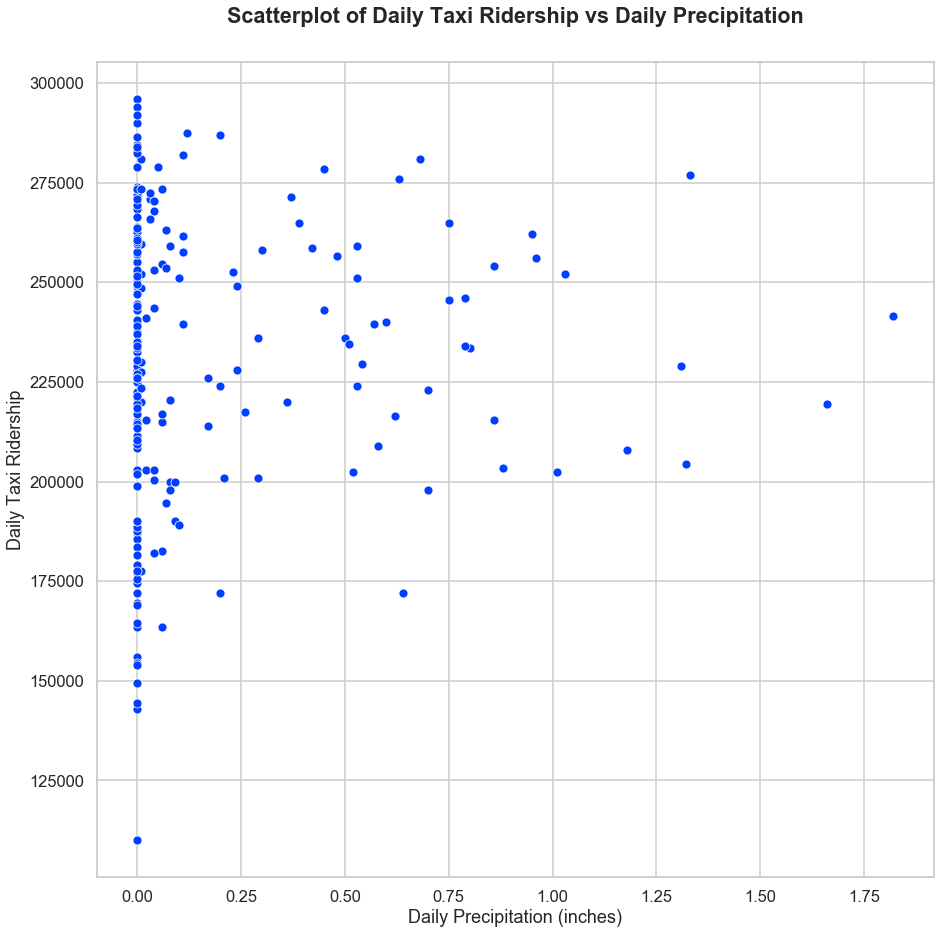

In [10]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(trip_count_weather_by_date_df["precipitation"],trip_count_weather_by_date_df["trip_count"]).set(ylabel='Daily Taxi Ridership', xlabel="Daily Precipitation (inches)")
ax.set_yticklabels((ax.get_yticks() * 1/0.002).astype(int))
plt.title("Scatterplot of Daily Taxi Ridership vs Daily Precipitation", fontweight="bold", fontsize="large", y=1.04)
plt.show()

In [11]:
np.corrcoef(trip_count_weather_by_date_df["precipitation"],trip_count_weather_by_date_df["trip_count"])

array([[1.        , 0.04993018],
       [0.04993018, 1.        ]])

Positive correlation between precipitation and number of trips in a day. High precipitation guarantees high trip count, but high trip count does not only occur on high-precipitation days. 

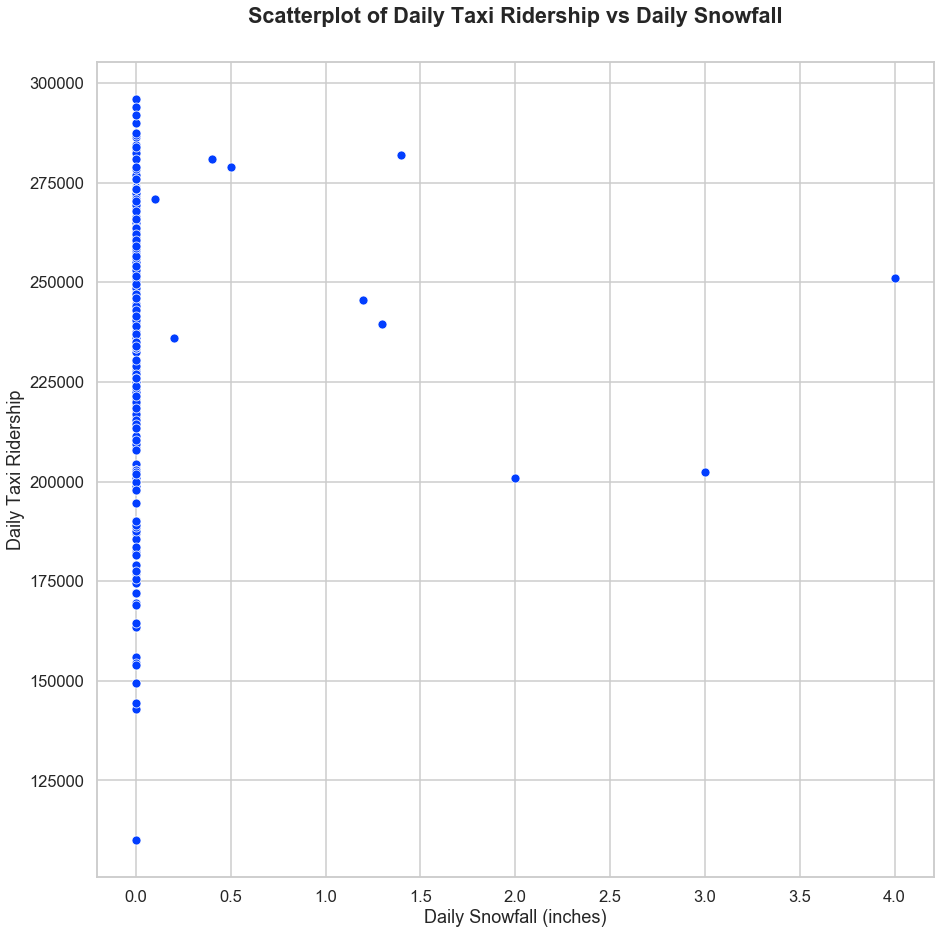

In [12]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(trip_count_weather_by_date_df["newsnow"],trip_count_weather_by_date_df["trip_count"]).set(ylabel='Daily Taxi Ridership', xlabel="Daily Snowfall (inches)")
ax.set_yticklabels((ax.get_yticks() * 1/0.002).astype(int))
plt.title("Scatterplot of Daily Taxi Ridership vs Daily Snowfall", fontweight="bold", fontsize="large", y=1.04)
plt.show()

Too few days with snowfall to draw meaningful conclusions. 

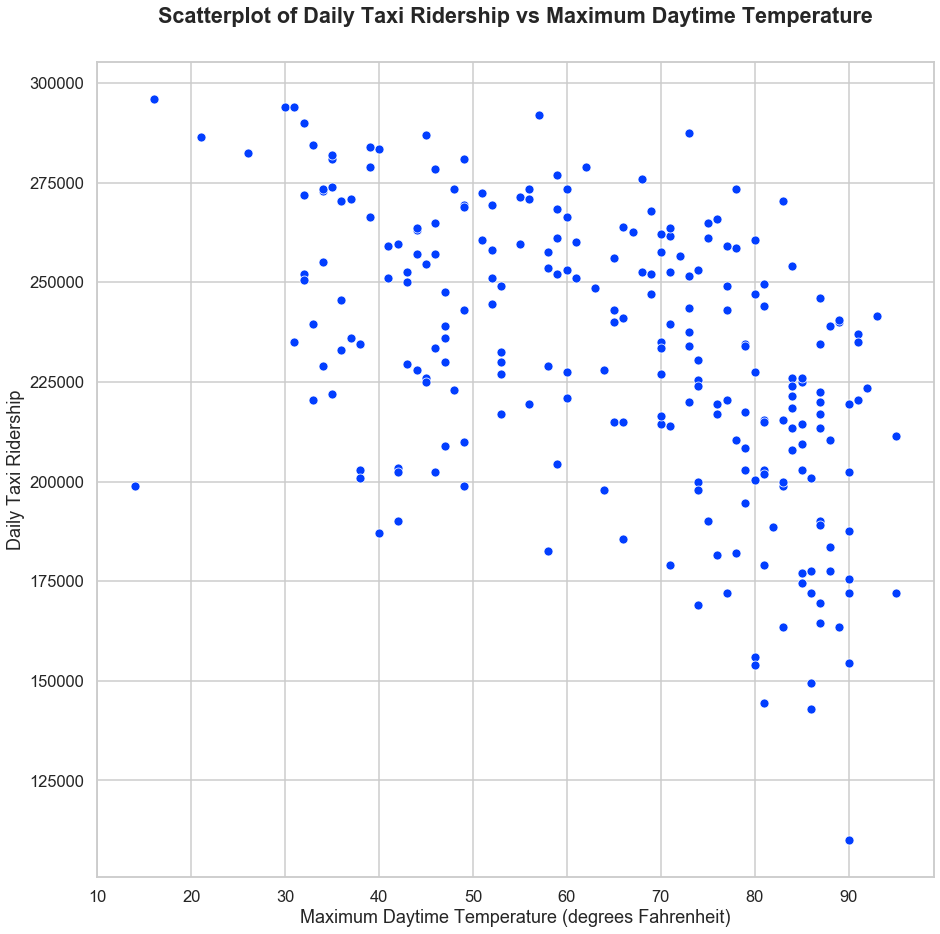

In [13]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(trip_count_weather_by_date_df["maxtemp"],trip_count_weather_by_date_df["trip_count"]).set(ylabel='Daily Taxi Ridership', xlabel="Maximum Daytime Temperature (degrees Fahrenheit)")
ax.set_yticklabels((ax.get_yticks() * 1/0.002).astype(int))
plt.title("Scatterplot of Daily Taxi Ridership vs Maximum Daytime Temperature", fontweight="bold", fontsize="large", y=1.04)
plt.show()

In [14]:
np.corrcoef(trip_count_weather_by_date_df["maxtemp"],trip_count_weather_by_date_df["trip_count"])

array([[ 1.        , -0.52443419],
       [-0.52443419,  1.        ]])

An increase in daytime temperature is correlated with a decrease in daily taxi ridership. There is a moderately strong negative correlation. 

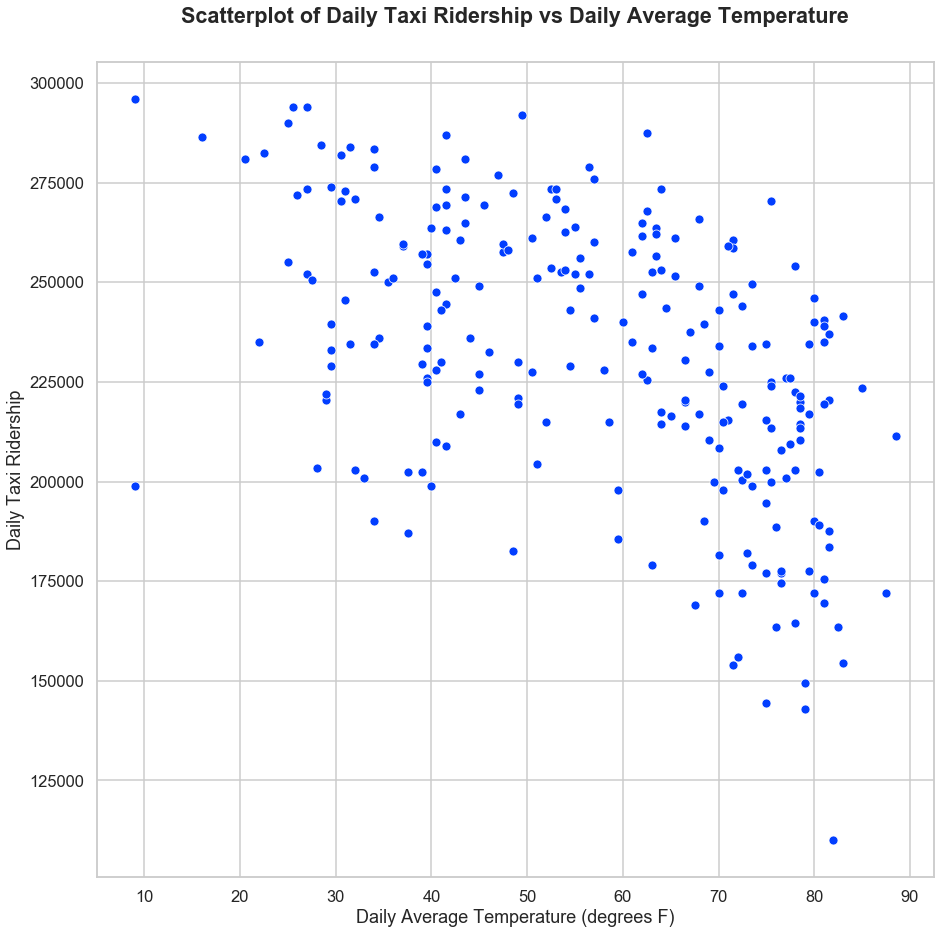

In [15]:
fig,ax=plt.subplots(figsize=(15,15))
sns.scatterplot(trip_count_weather_by_date_df["avetemp"],trip_count_weather_by_date_df["trip_count"]).set(ylabel='Daily Taxi Ridership', xlabel="Daily Average Temperature (degrees F)")
ax.set_yticklabels((ax.get_yticks() * 1/0.002).astype(int))
plt.title("Scatterplot of Daily Taxi Ridership vs Daily Average Temperature", fontweight="bold", fontsize="large", y=1.04)
plt.show()

In [16]:
np.corrcoef(trip_count_weather_by_date_df["avetemp"],trip_count_weather_by_date_df["trip_count"])

array([[ 1.        , -0.53345522],
       [-0.53345522,  1.        ]])

An increase in daily average temperature is correlated with a decrease in daily taxi ridership. There is a moderately strong negative correlation.  

# How is Taxi Ridership Correlated with Time of Day?

In [17]:
# trip_duration_df = df[["pickup_datetime","dropoff_datetime","PULocationID","DOLocationID","pickup_dayofweek"]]

In [18]:
# trip_time_df["pickup_hour"]=pd.to_datetime(df['pickup_datetime']).dt.hour

In [19]:
# trip_count_by_hour = trip_time_df.groupby("pickup_hour")["pickup_datetime"].count().to_frame("trip_count_by_hour")
# trip_count_by_hour.reset_index(inplace=True)
# trip_time_df.merge(trip_count_by_hour, how="left", left_on=pd.to_datetime(df['pickup_datetime']).dt.hour, right_on="pickup_hour")

In [20]:
scaled_daily_df = pd.concat([df]*round(1/0.002/242))
scaled_daily_df

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,RatecodeID,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,...,date,maxtemp,mintemp,avetemp,departuretemp,hdd,cdd,precipitation,newsnow,snowdepth
0,2019-01-17 18:30:40,2019-01-17 18:35:20,162,233,1.0,0.0,1.0,5.0,0.3,0.5,...,2019-01-17,33.0,24.0,28.5,-3.7,36.0,0.0,0.00,0.0,0.0
1,2019-01-07 20:45:41,2019-01-07 21:10:25,186,75,1.0,0.0,0.5,19.5,0.3,0.5,...,2019-01-07,34.0,25.0,29.5,-3.2,35.0,0.0,0.00,0.0,0.0
2,2019-01-29 10:00:49,2019-01-29 10:07:37,236,237,1.0,0.0,0.0,6.0,0.3,0.5,...,2019-01-29,43.0,25.0,34.0,1.1,31.0,0.0,0.23,0.0,0.0
3,2019-01-10 05:54:57,2019-01-10 06:12:44,211,138,1.0,0.0,0.5,29.0,0.3,0.5,...,2019-01-10,34.0,28.0,31.0,-1.4,34.0,0.0,0.00,0.0,0.0
4,2019-01-24 08:59:00,2019-01-24 09:12:27,233,170,1.0,0.0,0.0,9.0,0.3,0.5,...,2019-01-24,59.0,35.0,47.0,14.5,18.0,0.0,1.33,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112475,2019-08-06 13:51:50,2019-08-06 13:58:00,152,152,1.0,0.0,0.0,5.5,0.3,0.5,...,2019-08-06,79.0,71.0,75.0,-1.3,0.0,10.0,0.04,0.0,0.0
112476,2019-08-09 21:52:07,2019-08-09 22:07:06,113,230,1.0,2.5,0.5,11.0,0.3,0.5,...,2019-08-09,83.0,68.0,75.5,-0.6,0.0,11.0,0.08,0.0,0.0
112477,2019-08-01 11:00:06,2019-08-01 11:43:22,138,233,1.0,2.5,0.0,38.5,0.3,0.5,...,2019-08-01,87.0,70.0,78.5,2.0,0.0,14.0,0.00,0.0,0.0
112478,2019-08-18 14:53:39,2019-08-18 14:59:54,141,162,1.0,2.5,0.0,6.0,0.3,0.5,...,2019-08-18,90.0,70.0,80.0,4.8,0.0,15.0,0.64,0.0,0.0


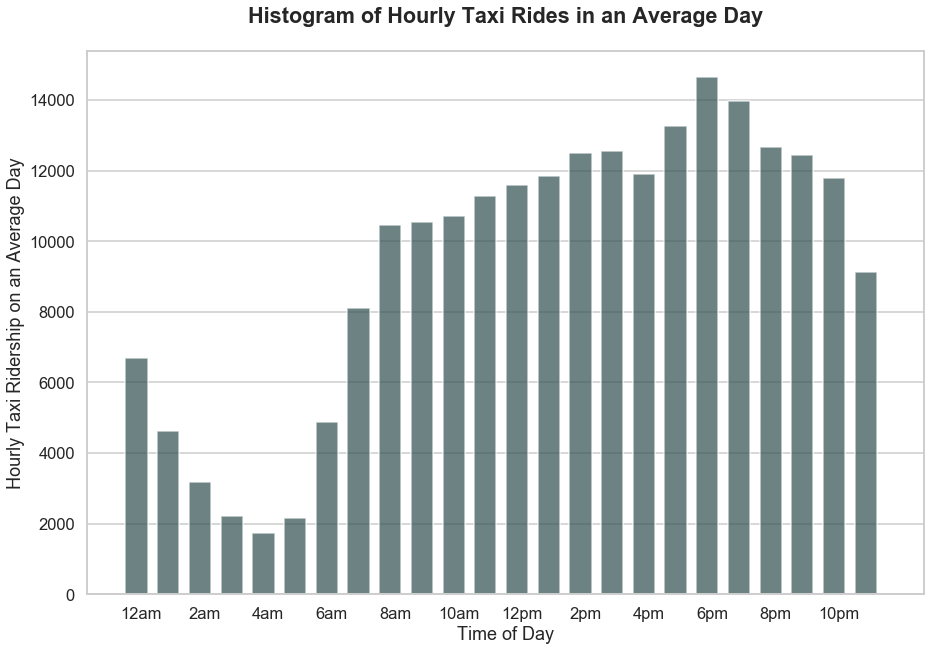

In [21]:
plt.figure(figsize=(15,10))
g=sns.distplot(pd.to_datetime(scaled_daily_df['pickup_datetime']).dt.hour, bins=np.arange(0,25,1)-0.5, kde=False, hist_kws={"width":0.7, "color":"darkslategray", 'alpha': 0.7})
g.xaxis.grid(b=False)
plt.xticks(np.arange(0,26, 2), labels=["12am","2am","4am","6am","8am","10am","12pm","2pm","4pm","6pm","8pm","10pm"])
plt.xlabel("Time of Day")
plt.ylabel("Hourly Taxi Ridership on an Average Day")
plt.title("Histogram of Hourly Taxi Rides in an Average Day", fontweight="bold", fontsize="large", y=1.04)
plt.show()

Taxi ridership is lowest in the early morning and peaks at 6pm in an average day. 

In [22]:
isweekend_df=scaled_daily_df.copy()
isweekend_df["isweekend"]=isweekend_df["pickup_dayofweek"].isin([5,6])
isweekend_df[["pickup_dayofweek","isweekend"]]

,pickup_dayofweek,isweekend
0,3,False
1,0,False
2,1,False
3,3,False
4,3,False
...,...,...
112475,1,False
112476,4,False
112477,3,False
112478,6,True


In [23]:
isweekend_y_df=isweekend_df[isweekend_df["isweekend"]==True]
isweekend_n_df=isweekend_df[isweekend_df["isweekend"]==False]

# accounting for how isweekend_df["isweekend"]==True occurs 2/7 of the time
scaled_isweekend_y_df = pd.concat([isweekend_y_df]*5)
scaled_isweekend_n_df = pd.concat([isweekend_n_df]*2)

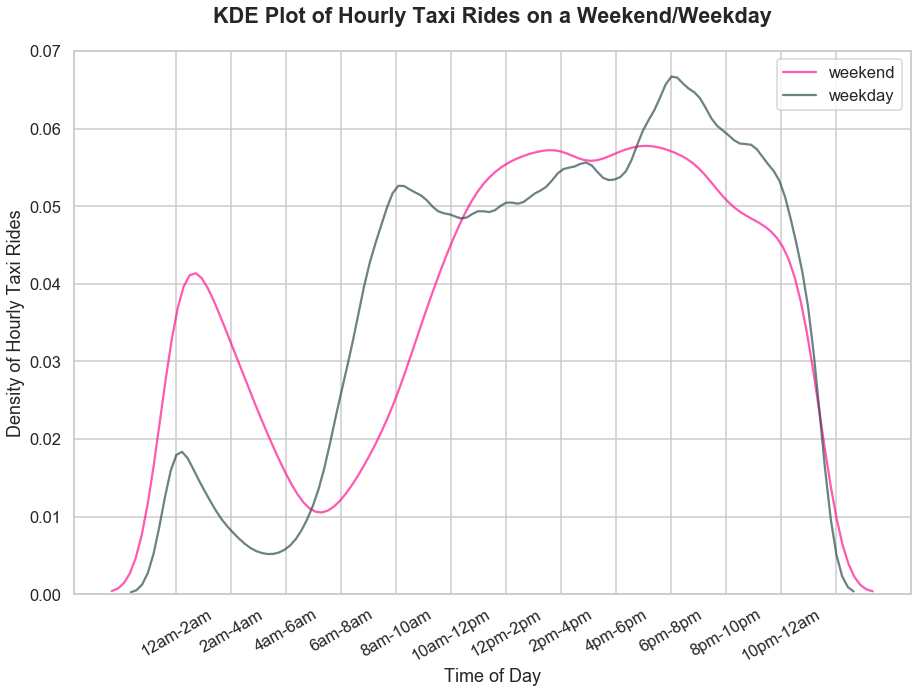

In [24]:
# f, axes = plt.subplots(1, 2, figsize=(20, 20), sharex=True)
plt.figure(figsize=(15,10))
sns.distplot(pd.to_datetime(isweekend_y_df['pickup_datetime']).dt.hour, bins=np.arange(0,25,2)-0.5, hist=False, label="weekend", kde_kws={"color":"deeppink", 'alpha': 0.7})
sns.distplot(pd.to_datetime(isweekend_n_df['pickup_datetime']).dt.hour, bins=np.arange(0,25,2)-0.5, hist=False,  label="weekday", kde_kws={"color":"darkslategray", 'alpha': 0.7})
plt.xticks(np.arange(0,25,2), labels=["12am-2am","2am-4am","4am-6am","6am-8am","8am-10am","10am-12pm","12pm-2pm","2pm-4pm","4pm-6pm","6pm-8pm","8pm-10pm","10pm-12am"], rotation=30)
plt.xlabel("Time of Day")
plt.ylabel("Density of Hourly Taxi Rides")
plt.legend()
plt.title("KDE Plot of Hourly Taxi Rides on a Weekend/Weekday", fontweight="bold", fontsize="large", y=1.04)
plt.show()


On weekends, a higher fraction of taxi rides occur in the early hours of the morning (12-4am), perhaps due to the crowd returning from parties. On weekdays, a higher fraction of rides occur in the mid-morning (8-10am) and early evening (6-8pm) as people commute to and from work. 

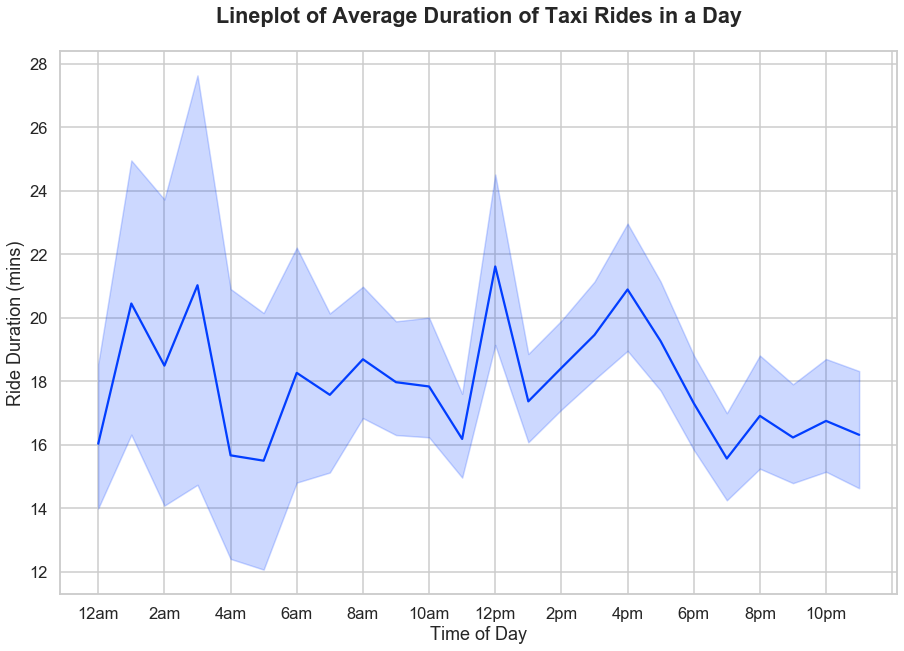

In [25]:
plt.figure(figsize=(15,10))
g=sns.lineplot(pd.to_datetime(df['pickup_datetime']).dt.hour, df["trip_duration_mins"])
plt.xticks(np.arange(0,26, 2), labels=["12am","2am","4am","6am","8am","10am","12pm","2pm","4pm","6pm","8pm","10pm"])
plt.xlabel("Time of Day")
plt.ylabel("Ride Duration (mins)")
plt.title("Lineplot of Average Duration of Taxi Rides in a Day", fontweight="bold", fontsize="large", y=1.04)
plt.show()

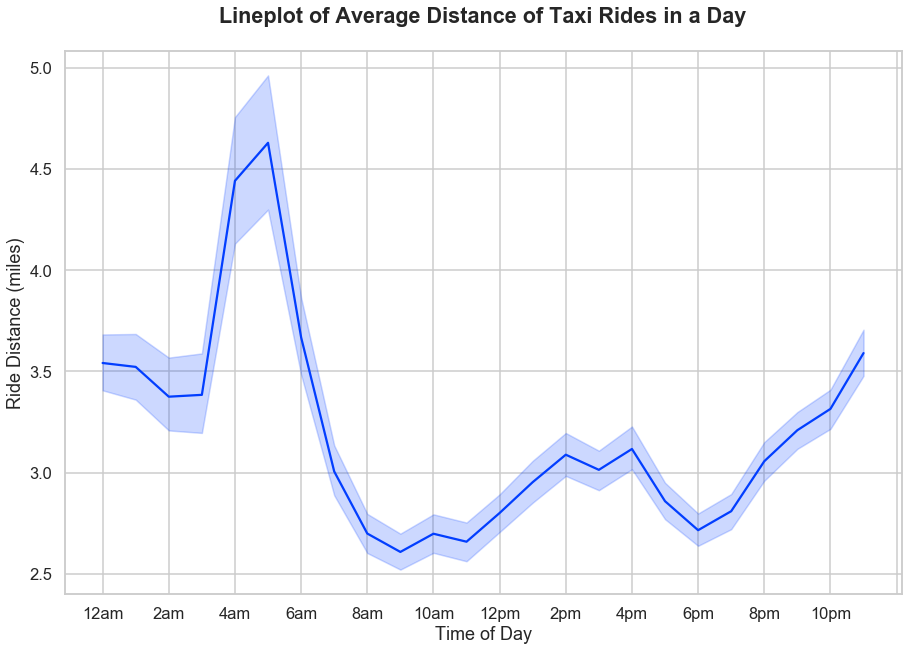

In [26]:
plt.figure(figsize=(15,10))
g=sns.lineplot(pd.to_datetime(df['pickup_datetime']).dt.hour, df["trip_distance"])
plt.xticks(np.arange(0,26, 2), labels=["12am","2am","4am","6am","8am","10am","12pm","2pm","4pm","6pm","8pm","10pm"])
plt.xlabel("Time of Day")
plt.ylabel("Ride Distance (miles)")
plt.title("Lineplot of Average Distance of Taxi Rides in a Day", fontweight="bold", fontsize="large", y=1.04)
plt.show()

In [27]:
df[df["trip_duration_mins"]==0]["trip_distance"]

32964     0.60
101724    0.01
109086    0.50
Name: trip_distance, dtype: float64

In [28]:
positive_trip_duration_df=df[df["trip_duration_mins"]>0]

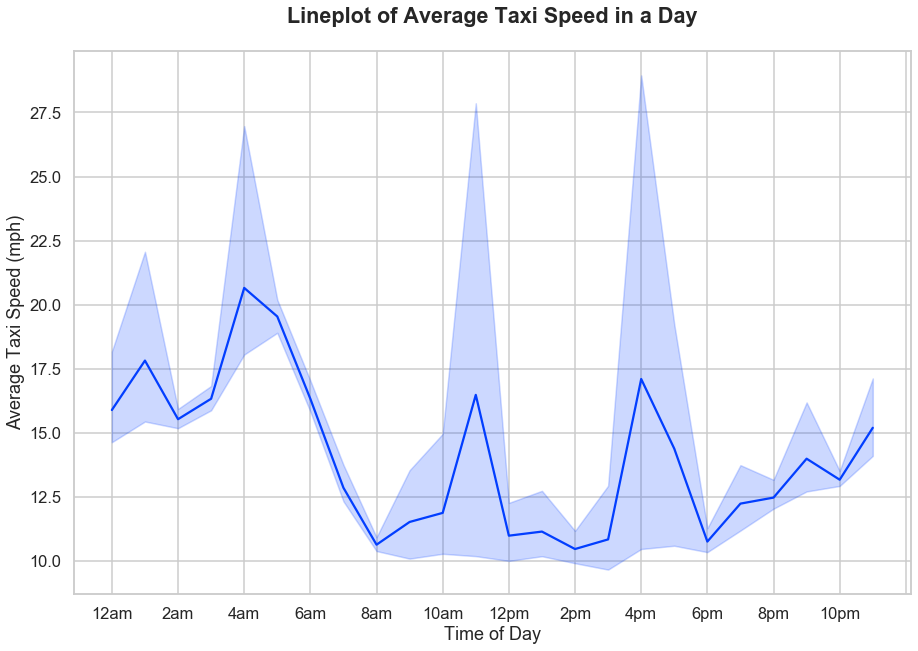

In [29]:
plt.figure(figsize=(15,10))
g=sns.lineplot(pd.to_datetime(positive_trip_duration_df['pickup_datetime']).dt.hour, positive_trip_duration_df["trip_distance"]/(positive_trip_duration_df["trip_duration_mins"]/60))
plt.xticks(np.arange(0,26, 2), labels=["12am","2am","4am","6am","8am","10am","12pm","2pm","4pm","6pm","8pm","10pm"])
plt.xlabel("Time of Day")
plt.ylabel("Average Taxi Speed (mph)")
plt.title("Lineplot of Average Taxi Speed in a Day", fontweight="bold", fontsize="large", y=1.04)
plt.show()

Average taxi speed is much higher in the early morning hours (around 4am). Therefore, even though these early-morning trips tend to be longer in distance, they last about the same duration as shorter-distance (but much slower) taxi trips around noon. 

In [30]:
isweekend_df=positive_trip_duration_df.copy()
isweekend_df["isweekend"]=isweekend_df["pickup_dayofweek"].isin([5,6])
isweekend_df['isweekend'] = isweekend_df['isweekend'].map({False: 'weekday', True: 'weekend'})
isweekend_df[["pickup_dayofweek","isweekend"]]

,pickup_dayofweek,isweekend
0,3,weekday
1,0,weekday
2,1,weekday
3,3,weekday
4,3,weekday
...,...,...
112475,1,weekday
112476,4,weekday
112477,3,weekday
112478,6,weekend


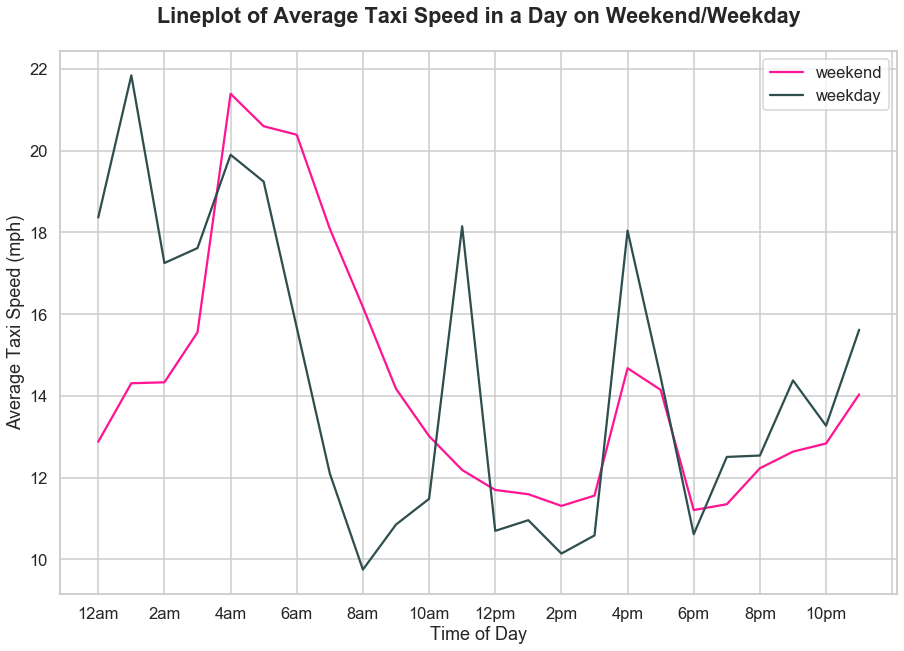

In [31]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(pd.to_datetime(isweekend_df['pickup_datetime']).dt.hour, isweekend_df["trip_distance"]/(isweekend_df["trip_duration_mins"]/60), hue=isweekend_df["isweekend"], hue_order=["weekend","weekday"], err_style=None, palette=sns.color_palette(palette = ["deeppink", "darkslategray"]))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.xticks(np.arange(0,26, 2), labels=["12am","2am","4am","6am","8am","10am","12pm","2pm","4pm","6pm","8pm","10pm"])
plt.xlabel("Time of Day")
plt.ylabel("Average Taxi Speed (mph)")
plt.title("Lineplot of Average Taxi Speed in a Day on Weekend/Weekday", fontweight="bold", fontsize="large", y=1.04)
plt.show()

# Other Correlations in the Data

In [32]:
isweekend_df.columns

Index(['pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID',
       'RatecodeID', 'congestion_surcharge', 'extra', 'fare_amount',
       'improvement_surcharge', 'mta_tax', 'passenger_count', 'payment_type',
       'store_and_fwd_flag', 'tip_amount', 'tolls_amount', 'total_amount',
       'trip_distance', 'pickup_dayofweek', 'trip_duration_mins', 'date',
       'maxtemp', 'mintemp', 'avetemp', 'departuretemp', 'hdd', 'cdd',
       'precipitation', 'newsnow', 'snowdepth', 'isweekend'],
      dtype='object')

In [33]:
taxi_zone_lookup_df = pd.read_csv("taxi_zone_lookup.csv")
taxi_zone_lookup_df.head()

,LocationID,Borough,Zone,service_zone,manhattan_zone
0,1,EWR,Newark Airport,EWR,NaN
1,2,Queens,Jamaica Bay,Boro Zone,NaN
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,NaN
3,4,Manhattan,Alphabet City,Yellow Zone,Downtown
4,5,Staten Island,Arden Heights,Boro Zone,NaN


In [35]:
lagg_df=isweekend_df.merge(taxi_zone_lookup_df,how="left",left_on=isweekend_df["PULocationID"], right_on=taxi_zone_lookup_df["LocationID"])
lagg_df.rename(columns={"Borough":"PUborough","Zone":"PUzone","service_zone":"PUservice_zone","manhattan_zone":"PUmanhattan_zone"},inplace=True)
lagg_df.drop(columns=["key_0","LocationID"],inplace=True)
lagg_df=lagg_df.merge(taxi_zone_lookup_df,how="left",left_on=lagg_df["DOLocationID"], right_on=taxi_zone_lookup_df["LocationID"])
lagg_df.rename(columns={"Borough":"DOborough","Zone":"DOzone","service_zone":"DOservice_zone","manhattan_zone":"DOmanhattan_zone"},inplace=True)
lagg_df.drop(columns=["key_0","LocationID"],inplace=True)
lagg_df.replace({"isweekend": {"weekday":0,"weekend":1}}, inplace=True)
lagg_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,RatecodeID,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,...,snowdepth,isweekend,PUborough,PUzone,PUservice_zone,PUmanhattan_zone,DOborough,DOzone,DOservice_zone,DOmanhattan_zone
0,2019-01-17 18:30:40,2019-01-17 18:35:20,162,233,1.0,0.0,1.0,5.0,0.3,0.5,...,0.0,0,Manhattan,Midtown East,Yellow Zone,Midtown,Manhattan,UN/Turtle Bay South,Yellow Zone,Midtown
1,2019-01-07 20:45:41,2019-01-07 21:10:25,186,75,1.0,0.0,0.5,19.5,0.3,0.5,...,0.0,0,Manhattan,Penn Station/Madison Sq West,Yellow Zone,Midtown,Manhattan,East Harlem South,Boro Zone,Uptown
2,2019-01-29 10:00:49,2019-01-29 10:07:37,236,237,1.0,0.0,0.0,6.0,0.3,0.5,...,0.0,0,Manhattan,Upper East Side North,Yellow Zone,Uptown,Manhattan,Upper East Side South,Yellow Zone,Uptown
3,2019-01-10 05:54:57,2019-01-10 06:12:44,211,138,1.0,0.0,0.5,29.0,0.3,0.5,...,0.0,0,Manhattan,SoHo,Yellow Zone,Downtown,Queens,LaGuardia Airport,Airports,NaN
4,2019-01-24 08:59:00,2019-01-24 09:12:27,233,170,1.0,0.0,0.0,9.0,0.3,0.5,...,0.0,0,Manhattan,UN/Turtle Bay South,Yellow Zone,Midtown,Manhattan,Murray Hill,Yellow Zone,Midtown


In [36]:
lagg_df["PUtime_of_day"]=pd.to_datetime(lagg_df['pickup_datetime']).dt.hour
lagg_df.replace({"PUtime_of_day": {3:"early morning",4:"early morning",5:"early morning",6:"early morning",7:"morning rush hour",8:"morning rush hour",9:"morning rush hour",10:"morning rush hour",11:"lunchtime",12:"lunchtime",13:"lunchtime",14:"lunchtime",15:"evening rush hour",16:"evening rush hour",17:"evening rush hour",18:"evening rush hour",19:"late evening",20:"late evening",21:"late evening",22:"late evening", 23:"late night",0:"late night",1:"late night",2:"late night"}}, inplace=True)
lagg_df["DOtime_of_day"]=pd.to_datetime(lagg_df['dropoff_datetime']).dt.hour
lagg_df.replace({"DOtime_of_day": {3:"early morning",4:"early morning",5:"early morning",6:"early morning",7:"morning rush hour",8:"morning rush hour",9:"morning rush hour",10:"morning rush hour",11:"lunchtime",12:"lunchtime",13:"lunchtime",14:"lunchtime",15:"evening rush hour",16:"evening rush hour",17:"evening rush hour",18:"evening rush hour",19:"late evening",20:"late evening",21:"late evening",22:"late evening", 23:"late night",0:"late night",1:"late night",2:"late night"}}, inplace=True)

In [37]:
pu_manhattan_df=lagg_df[~pd.isnull(lagg_df["PUmanhattan_zone"])]

In [38]:
do_manhattan_df=lagg_df[~pd.isnull(lagg_df["DOmanhattan_zone"])]

In [39]:
manhattan_df=lagg_df[~pd.isnull(lagg_df["PUmanhattan_zone"])|~pd.isnull(lagg_df["DOmanhattan_zone"])]
manhattan_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,RatecodeID,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,...,PUborough,PUzone,PUservice_zone,PUmanhattan_zone,DOborough,DOzone,DOservice_zone,DOmanhattan_zone,PUtime_of_day,DOtime_of_day
0,2019-01-17 18:30:40,2019-01-17 18:35:20,162,233,1.0,0.0,1.0,5.0,0.3,0.5,...,Manhattan,Midtown East,Yellow Zone,Midtown,Manhattan,UN/Turtle Bay South,Yellow Zone,Midtown,evening rush hour,evening rush hour
1,2019-01-07 20:45:41,2019-01-07 21:10:25,186,75,1.0,0.0,0.5,19.5,0.3,0.5,...,Manhattan,Penn Station/Madison Sq West,Yellow Zone,Midtown,Manhattan,East Harlem South,Boro Zone,Uptown,late evening,late evening
2,2019-01-29 10:00:49,2019-01-29 10:07:37,236,237,1.0,0.0,0.0,6.0,0.3,0.5,...,Manhattan,Upper East Side North,Yellow Zone,Uptown,Manhattan,Upper East Side South,Yellow Zone,Uptown,morning rush hour,morning rush hour
3,2019-01-10 05:54:57,2019-01-10 06:12:44,211,138,1.0,0.0,0.5,29.0,0.3,0.5,...,Manhattan,SoHo,Yellow Zone,Downtown,Queens,LaGuardia Airport,Airports,NaN,early morning,early morning
4,2019-01-24 08:59:00,2019-01-24 09:12:27,233,170,1.0,0.0,0.0,9.0,0.3,0.5,...,Manhattan,UN/Turtle Bay South,Yellow Zone,Midtown,Manhattan,Murray Hill,Yellow Zone,Midtown,morning rush hour,morning rush hour


In [40]:
pu_manhattan_df.corr()

,PULocationID,DOLocationID,RatecodeID,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,...,maxtemp,mintemp,avetemp,departuretemp,hdd,cdd,precipitation,newsnow,snowdepth,isweekend
PULocationID,1.000000,0.077862,-0.003959,0.039151,0.013675,-0.032672,-0.002623,0.005146,-0.003999,-0.023629,...,-0.015812,-0.015613,-0.015856,-0.012001,0.013652,-0.016588,-0.000773,-0.001392,0.004500,-0.032685
DOLocationID,0.077862,1.000000,-0.016160,0.040298,0.005531,-0.118720,0.006450,0.057343,-0.004492,-0.025107,...,-0.011822,-0.010821,-0.011440,-0.007591,0.010737,-0.009607,0.003363,0.001019,0.001959,-0.026195
RatecodeID,-0.003959,-0.016160,1.000000,-0.034679,-0.015348,0.183186,-0.006409,-0.250167,-0.005851,0.003957,...,0.000718,0.001443,0.001077,0.000686,0.000251,0.003871,-0.001492,-0.003135,-0.001801,0.002897
congestion_surcharge,0.039151,0.040298,-0.034679,1.000000,0.284739,-0.009298,0.008714,0.104559,0.002382,-0.022855,...,0.463447,0.470430,0.470971,0.084257,-0.509808,0.233935,0.052507,0.019834,0.034120,0.014629
extra,0.013675,0.005531,-0.015348,0.284739,1.000000,0.005881,0.004039,0.039551,-0.175112,-0.009173,...,0.120658,0.123642,0.123184,0.018716,-0.138091,0.049918,0.017956,0.003099,0.015995,-0.081423
fare_amount,-0.032672,-0.118720,0.183186,-0.009298,0.005881,1.000000,0.003236,-0.311291,0.009178,-0.037185,...,0.032150,0.031887,0.032308,0.003943,-0.034953,0.016636,0.001923,-0.014512,-0.008894,-0.014928
improvement_surcharge,-0.002623,0.006450,-0.006409,0.008714,0.004039,0.003236,1.000000,0.090130,-0.001046,-0.013365,...,-0.005330,-0.006543,-0.005968,0.000426,0.005947,-0.004288,-0.000867,0.001583,0.001783,-0.007702
mta_tax,0.005146,0.057343,-0.250167,0.104559,0.039551,-0.311291,0.090130,1.000000,0.001213,0.000491,...,0.000506,0.001280,0.000888,0.000424,-0.001996,-0.002129,0.004952,0.003492,0.003820,-0.006003
passenger_count,-0.003999,-0.004492,-0.005851,0.002382,-0.175112,0.009178,-0.001046,0.001213,1.000000,0.019130,...,0.000882,-0.000251,0.000338,0.002014,-0.000775,-0.000854,-0.002504,0.002046,-0.001232,0.032889
payment_type,-0.023629,-0.025107,0.003957,-0.022855,-0.009173,-0.037185,-0.013365,0.000491,0.019130,1.000000,...,0.021077,0.020097,0.020788,0.013918,-0.016161,0.025541,-0.005166,0.005107,0.000164,0.042039


# What can Pickup and Dropoff Locations Tell Us?

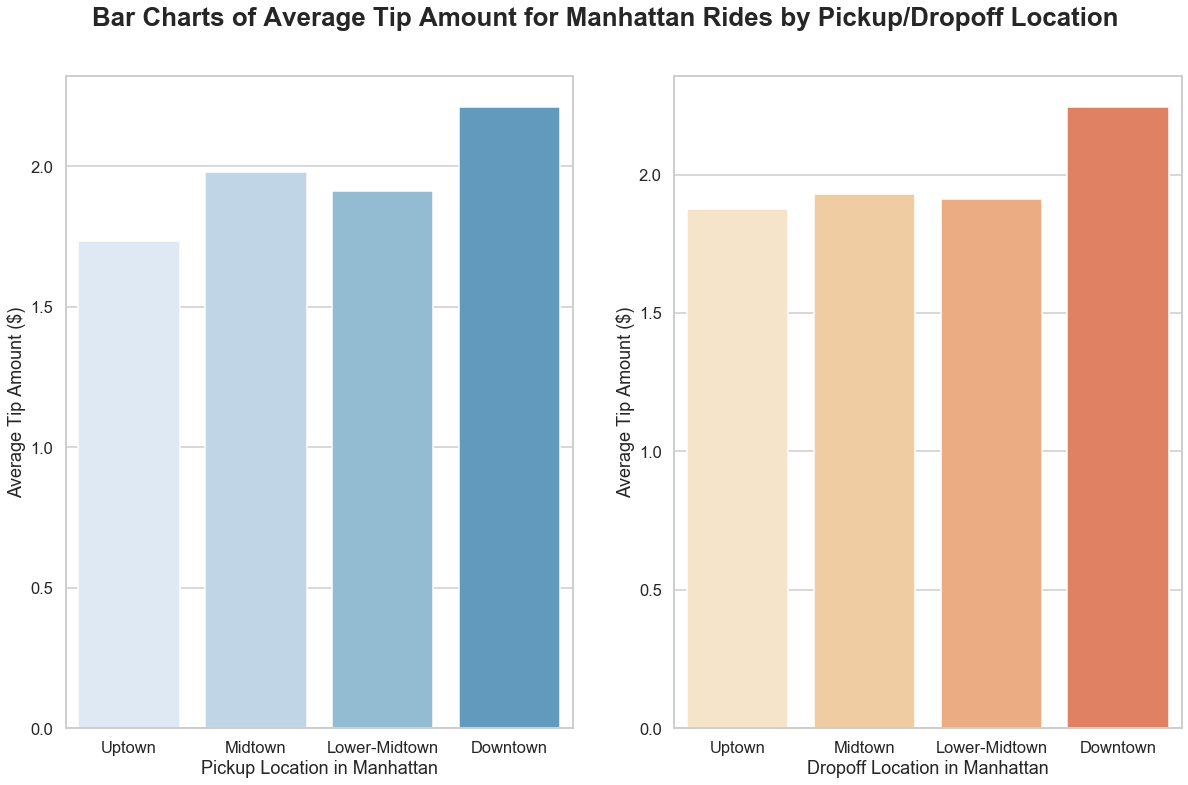

In [41]:
fig,axes=plt.subplots(1,2, figsize=(20,12))

sns.barplot(pu_manhattan_df["PUmanhattan_zone"], pu_manhattan_df["tip_amount"], order=["Uptown", "Midtown", "Lower-Midtown", "Downtown"], ci=None, ax=axes[0], palette=sns.color_palette("Blues")).set(ylabel='Average Tip Amount ($)', xlabel="Pickup Location in Manhattan")

sns.barplot(do_manhattan_df["DOmanhattan_zone"], do_manhattan_df["tip_amount"], order=["Uptown", "Midtown", "Lower-Midtown", "Downtown"], ci=None, ax=axes[1],  palette=sns.color_palette("OrRd")).set(ylabel='Average Tip Amount ($)', xlabel="Dropoff Location in Manhattan")

fig.suptitle('Bar Charts of Average Tip Amount for Manhattan Rides by Pickup/Dropoff Location', fontsize="x-large", fontweight="bold", y=0.96)
plt.show()

Rides with pickups or dropoffs in the Downtown area of Manhattan consistently yield a higher tip amount. 

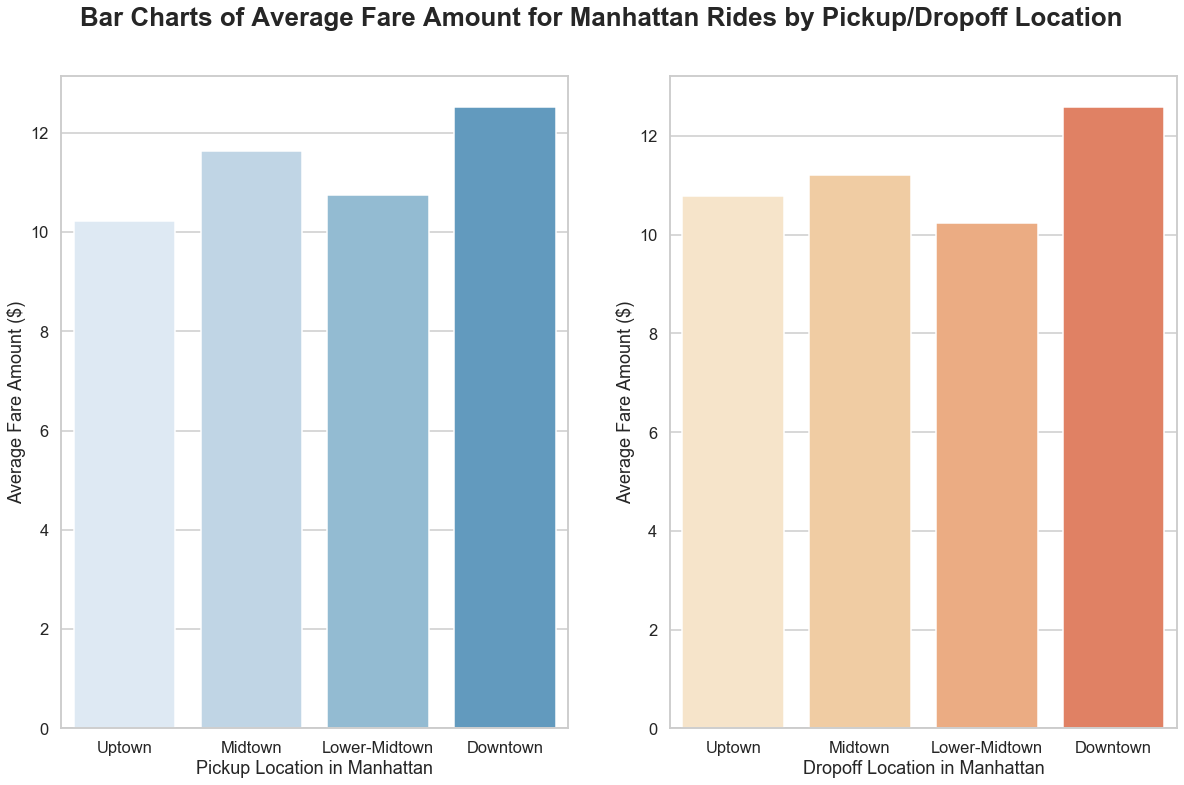

In [42]:
fig,axes=plt.subplots(1,2, figsize=(20,12))

sns.barplot(pu_manhattan_df["PUmanhattan_zone"], pu_manhattan_df["fare_amount"], order=["Uptown", "Midtown", "Lower-Midtown", "Downtown"], ci=None, ax=axes[0], palette=sns.color_palette("Blues")).set(ylabel='Average Fare Amount ($)', xlabel="Pickup Location in Manhattan")

sns.barplot(do_manhattan_df["DOmanhattan_zone"], do_manhattan_df["fare_amount"], order=["Uptown", "Midtown", "Lower-Midtown", "Downtown"], ci=None, ax=axes[1],  palette=sns.color_palette("OrRd")).set(ylabel='Average Fare Amount ($)', xlabel="Dropoff Location in Manhattan")

fig.suptitle('Bar Charts of Average Fare Amount for Manhattan Rides by Pickup/Dropoff Location', fontsize="x-large", fontweight="bold", y=0.96)
plt.show()

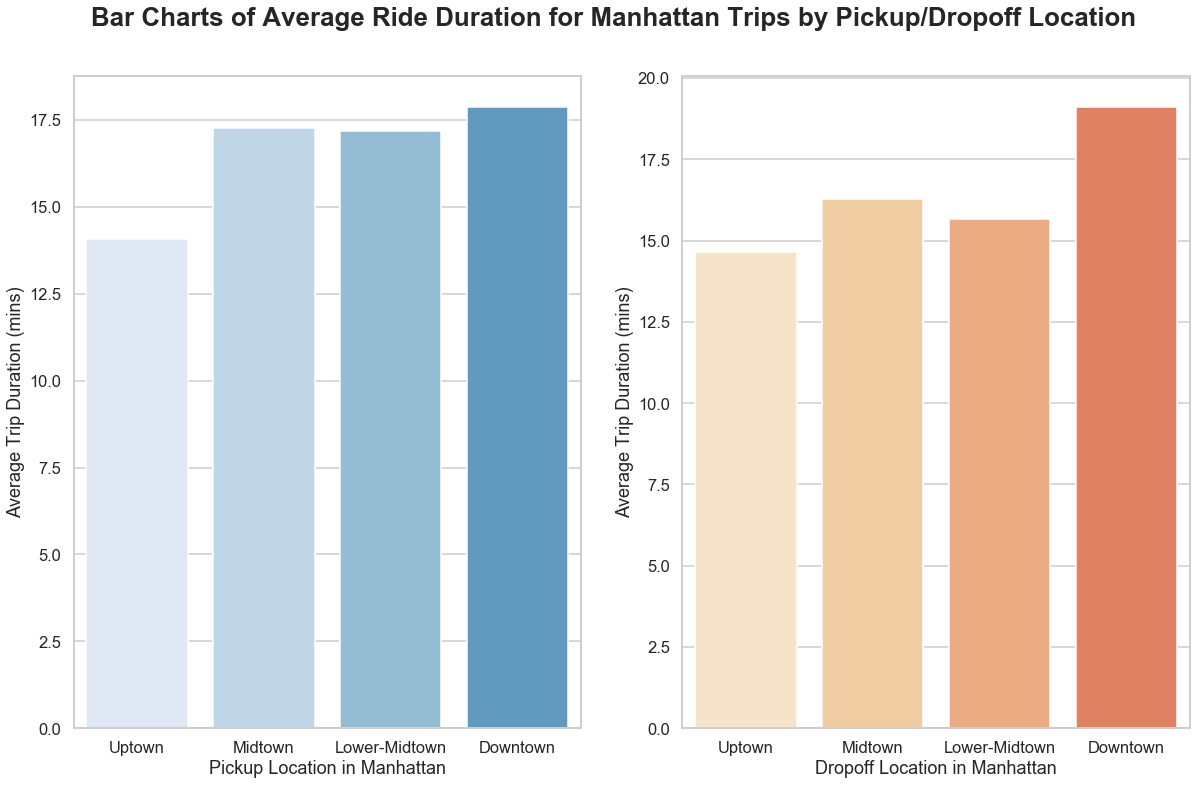

In [43]:
fig,axes=plt.subplots(1,2, figsize=(20,12))

sns.barplot(pu_manhattan_df["PUmanhattan_zone"], pu_manhattan_df["trip_duration_mins"], order=["Uptown", "Midtown", "Lower-Midtown", "Downtown"], ci=None, ax=axes[0], palette=sns.color_palette("Blues")).set(ylabel='Average Trip Duration (mins)', xlabel="Pickup Location in Manhattan")

sns.barplot(do_manhattan_df["DOmanhattan_zone"], do_manhattan_df["trip_duration_mins"], order=["Uptown", "Midtown", "Lower-Midtown", "Downtown"], ci=None, ax=axes[1],  palette=sns.color_palette("OrRd")).set(ylabel='Average Trip Duration (mins)', xlabel="Dropoff Location in Manhattan")

fig.suptitle('Bar Charts of Average Ride Duration for Manhattan Trips by Pickup/Dropoff Location', fontsize="x-large", fontweight="bold", y=0.96)
plt.show()

In [44]:
PUDO_downtown_y_df=manhattan_df[(manhattan_df["PUmanhattan_zone"]=="Downtown") | (manhattan_df["DOmanhattan_zone"]=="Downtown")]
PUDO_downtown_n_df=manhattan_df[(manhattan_df["PUmanhattan_zone"]!="Downtown") & (manhattan_df["DOmanhattan_zone"]!="Downtown")]

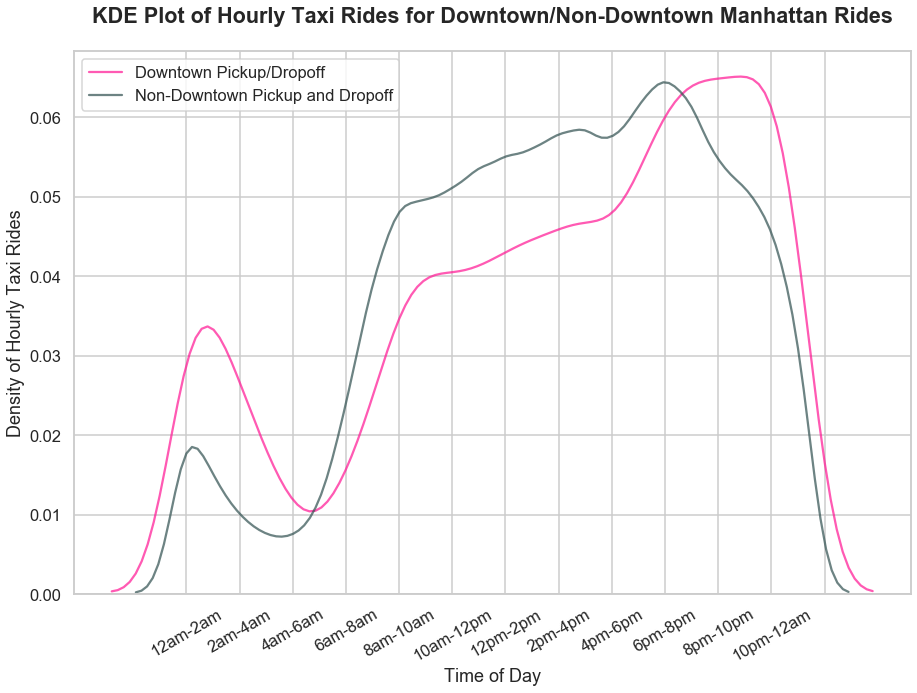

In [45]:
plt.figure(figsize=(15,10))
sns.distplot(pd.to_datetime(PUDO_downtown_y_df['pickup_datetime']).dt.hour, bins=np.arange(0,25,2)-0.5, hist=False, label="Downtown Pickup/Dropoff", kde_kws={"color":"deeppink", 'alpha': 0.7})
sns.distplot(pd.to_datetime(PUDO_downtown_n_df['pickup_datetime']).dt.hour, bins=np.arange(0,25,2)-0.5, hist=False,  label="Non-Downtown Pickup and Dropoff", kde_kws={"color":"darkslategray", 'alpha': 0.7})
plt.xticks(np.arange(0,25,2), labels=["12am-2am","2am-4am","4am-6am","6am-8am","8am-10am","10am-12pm","12pm-2pm","2pm-4pm","4pm-6pm","6pm-8pm","8pm-10pm","10pm-12am"], rotation=30)
plt.xlabel("Time of Day")
plt.ylabel("Density of Hourly Taxi Rides")
plt.legend(loc="upper left")
plt.title("KDE Plot of Hourly Taxi Rides for Downtown/Non-Downtown Manhattan Rides", fontweight="bold", fontsize="large", y=1.04)
plt.show()


In [46]:
manhattan_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,RatecodeID,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,...,PUborough,PUzone,PUservice_zone,PUmanhattan_zone,DOborough,DOzone,DOservice_zone,DOmanhattan_zone,PUtime_of_day,DOtime_of_day
0,2019-01-17 18:30:40,2019-01-17 18:35:20,162,233,1.0,0.0,1.0,5.0,0.3,0.5,...,Manhattan,Midtown East,Yellow Zone,Midtown,Manhattan,UN/Turtle Bay South,Yellow Zone,Midtown,evening rush hour,evening rush hour
1,2019-01-07 20:45:41,2019-01-07 21:10:25,186,75,1.0,0.0,0.5,19.5,0.3,0.5,...,Manhattan,Penn Station/Madison Sq West,Yellow Zone,Midtown,Manhattan,East Harlem South,Boro Zone,Uptown,late evening,late evening
2,2019-01-29 10:00:49,2019-01-29 10:07:37,236,237,1.0,0.0,0.0,6.0,0.3,0.5,...,Manhattan,Upper East Side North,Yellow Zone,Uptown,Manhattan,Upper East Side South,Yellow Zone,Uptown,morning rush hour,morning rush hour
3,2019-01-10 05:54:57,2019-01-10 06:12:44,211,138,1.0,0.0,0.5,29.0,0.3,0.5,...,Manhattan,SoHo,Yellow Zone,Downtown,Queens,LaGuardia Airport,Airports,NaN,early morning,early morning
4,2019-01-24 08:59:00,2019-01-24 09:12:27,233,170,1.0,0.0,0.0,9.0,0.3,0.5,...,Manhattan,UN/Turtle Bay South,Yellow Zone,Midtown,Manhattan,Murray Hill,Yellow Zone,Midtown,morning rush hour,morning rush hour


In [47]:
manhattan_df["is_downtown"] = 0

/Users/josiah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
manhattan_df["is_downtown"][(manhattan_df["PUmanhattan_zone"]=="Downtown") | (manhattan_df["DOmanhattan_zone"]=="Downtown")] = 1

/Users/josiah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/josiah/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/josiah/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [49]:
manhattan_df["payment_type"].value_counts()

1.0    77824
2.0    28512
3.0      360
4.0       93
Name: payment_type, dtype: int64

In [124]:
manhattanreg_df = manhattan_df.query("(payment_type!=3.0) & (payment_type!=4.0)")
manhattanreg_df = manhattancc_df.astype({"payment_type":"int32"})
manhattanreg_df.columns

Index(['pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID',
       'RatecodeID', 'congestion_surcharge', 'extra', 'fare_amount',
       'improvement_surcharge', 'mta_tax', 'passenger_count', 'payment_type',
       'store_and_fwd_flag', 'tip_amount', 'tolls_amount', 'total_amount',
       'trip_distance', 'pickup_dayofweek', 'trip_duration_mins', 'date',
       'maxtemp', 'mintemp', 'avetemp', 'departuretemp', 'hdd', 'cdd',
       'precipitation', 'newsnow', 'snowdepth', 'isweekend', 'PUborough',
       'PUzone', 'PUservice_zone', 'PUmanhattan_zone', 'DOborough', 'DOzone',
       'DOservice_zone', 'DOmanhattan_zone', 'PUtime_of_day', 'DOtime_of_day',
       'is_downtown'],
      dtype='object')

In [125]:
PUtimeofday_dummies=pd.get_dummies(manhattanreg_df["PUtime_of_day"])
manhattanreg_df=manhattanreg_df.join(PUtimeofday_dummies)
manhattanreg_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,RatecodeID,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,...,DOmanhattan_zone,PUtime_of_day,DOtime_of_day,is_downtown,early morning,evening rush hour,late evening,late night,lunchtime,morning rush hour
0,2019-01-17 18:30:40,2019-01-17 18:35:20,162,233,1.0,0.0,1.0,5.0,0.3,0.5,...,Midtown,evening rush hour,evening rush hour,0,0,1,0,0,0,0
1,2019-01-07 20:45:41,2019-01-07 21:10:25,186,75,1.0,0.0,0.5,19.5,0.3,0.5,...,Uptown,late evening,late evening,0,0,0,1,0,0,0
2,2019-01-29 10:00:49,2019-01-29 10:07:37,236,237,1.0,0.0,0.0,6.0,0.3,0.5,...,Uptown,morning rush hour,morning rush hour,0,0,0,0,0,0,1
3,2019-01-10 05:54:57,2019-01-10 06:12:44,211,138,1.0,0.0,0.5,29.0,0.3,0.5,...,NaN,early morning,early morning,1,1,0,0,0,0,0
4,2019-01-24 08:59:00,2019-01-24 09:12:27,233,170,1.0,0.0,0.0,9.0,0.3,0.5,...,Midtown,morning rush hour,morning rush hour,0,0,0,0,0,0,1


In [126]:
manhattanreg_df.rename(columns={"early morning":"pickup_early_morning", "morning rush hour":"pickup_morning_rush_hour", "lunchtime":"pickup_lunchtime", "evening rush hour":"pickup_evening_rush_hour", "late evening":"pickup_late_evening", "late night":"pickup_late_night"}, inplace=True)

In [127]:
DOtimeofday_dummies=pd.get_dummies(manhattanreg_df["DOtime_of_day"])
manhattanreg_df=manhattanreg_df.join(DOtimeofday_dummies)

In [128]:
manhattanreg_df.rename(columns={"early morning":"dropoff_early_morning", "morning rush hour":"dropoff_morning_rush_hour", "lunchtime":"dropoff_lunchtime", "evening rush hour":"dropoff_evening_rush_hour", "late evening":"dropoff_late_evening", "late night":"dropoff_late_night"}, inplace=True)
manhattanreg_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,RatecodeID,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,...,pickup_late_evening,pickup_late_night,pickup_lunchtime,pickup_morning_rush_hour,dropoff_early_morning,dropoff_evening_rush_hour,dropoff_late_evening,dropoff_late_night,dropoff_lunchtime,dropoff_morning_rush_hour
0,2019-01-17 18:30:40,2019-01-17 18:35:20,162,233,1.0,0.0,1.0,5.0,0.3,0.5,...,0,0,0,0,0,1,0,0,0,0
1,2019-01-07 20:45:41,2019-01-07 21:10:25,186,75,1.0,0.0,0.5,19.5,0.3,0.5,...,1,0,0,0,0,0,1,0,0,0
2,2019-01-29 10:00:49,2019-01-29 10:07:37,236,237,1.0,0.0,0.0,6.0,0.3,0.5,...,0,0,0,1,0,0,0,0,0,1
3,2019-01-10 05:54:57,2019-01-10 06:12:44,211,138,1.0,0.0,0.5,29.0,0.3,0.5,...,0,0,0,0,1,0,0,0,0,0
4,2019-01-24 08:59:00,2019-01-24 09:12:27,233,170,1.0,0.0,0.0,9.0,0.3,0.5,...,0,0,0,1,0,0,0,0,0,1


In [129]:
manhattanreg_df.drop(columns=["PUtime_of_day","DOtime_of_day"], inplace=True)

In [134]:
manhattanreg_df.describe()

,PULocationID,DOLocationID,RatecodeID,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,...,pickup_late_evening,pickup_late_night,pickup_lunchtime,pickup_morning_rush_hour,dropoff_early_morning,dropoff_evening_rush_hour,dropoff_late_evening,dropoff_late_night,dropoff_lunchtime,dropoff_morning_rush_hour
count,106336.000000,106336.000000,106336.000000,106336.000000,106336.000000,106336.000000,106336.000000,106336.000000,106336.000000,106336.000000,...,106336.000000,106336.000000,106336.000000,106336.000000,106336.000000,106336.000000,106336.000000,106336.000000,106336.000000,106336.000000
mean,163.341531,161.831807,1.044594,2.067933,1.100968,12.427463,0.299972,0.498505,1.574772,1.268131,...,0.226179,0.102637,0.211010,0.178839,0.044707,0.233007,0.230693,0.111637,0.207860,0.172096
std,65.736195,69.170091,0.660904,0.945241,1.250585,10.298503,0.002909,0.027302,1.226858,0.442988,...,0.418359,0.303486,0.408028,0.383219,0.206662,0.422748,0.421278,0.314920,0.405778,0.377466
min,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.000000,113.000000,1.000000,2.500000,0.000000,6.500000,0.300000,0.500000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,162.000000,162.000000,1.000000,2.500000,0.500000,9.000000,0.300000,0.500000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,233.000000,233.000000,1.000000,2.500000,2.500000,14.000000,0.300000,0.500000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,265.000000,265.000000,99.000000,2.500000,17.500000,228.000000,0.300000,0.500000,6.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
manhattanreg_df.columns

Index(['pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID',
       'RatecodeID', 'congestion_surcharge', 'extra', 'fare_amount',
       'improvement_surcharge', 'mta_tax', 'passenger_count', 'payment_type',
       'store_and_fwd_flag', 'tip_amount', 'tolls_amount', 'total_amount',
       'trip_distance', 'pickup_dayofweek', 'trip_duration_mins', 'date',
       'maxtemp', 'mintemp', 'avetemp', 'departuretemp', 'hdd', 'cdd',
       'precipitation', 'newsnow', 'snowdepth', 'isweekend', 'PUborough',
       'PUzone', 'PUservice_zone', 'PUmanhattan_zone', 'DOborough', 'DOzone',
       'DOservice_zone', 'DOmanhattan_zone', 'is_downtown',
       'pickup_early_morning', 'pickup_evening_rush_hour',
       'pickup_late_evening', 'pickup_late_night', 'pickup_lunchtime',
       'pickup_morning_rush_hour', 'dropoff_early_morning',
       'dropoff_evening_rush_hour', 'dropoff_late_evening',
       'dropoff_late_night', 'dropoff_lunchtime', 'dropoff_morning_rush_hour'],
      dtype='

In [139]:
model = smf.logit(formula="is_downtown ~ fare_amount + trip_duration_mins + tip_amount + payment_type + passenger_count + isweekend + precipitation + pickup_early_morning + pickup_morning_rush_hour + pickup_evening_rush_hour + pickup_late_evening + pickup_late_night + dropoff_early_morning + dropoff_morning_rush_hour + dropoff_evening_rush_hour + dropoff_late_evening + dropoff_late_night", data=manhattanreg_df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.545468
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_downtown   No. Observations:               106336
Model:                          Logit   Df Residuals:                   106318
Method:                           MLE   Df Model:                           17
Date:                Sat, 09 May 2020   Pseudo R-squ.:                 0.02577
Time:                        17:26:50   Log-Likelihood:                -58003.
converged:                       True   LL-Null:                       -59537.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -1.1818      0.035    -33.545      0.000      -1.251      -1.113
fare_amount                   0.0160      0.001     17.835      0.000       0.014       0.018
trip_duration_mins            0.0003   9.44e-05      2.916      0.004    9.02e-05       0.000
tip_amount                   -0.0197      0.004     -4.646      0.000      -0.028      -0.011
payment_type                 -0.3424      0.021    -16.334      0.000      -0.384      -0.301
passenger_count               0.0043      0.006      0.732      0.464      -0.007       0.016
isweekend                     0.3084      0.016     19.173      0.000       0.277       0.340
precipitation                -0.0479      0.023     -2.067      0.039      -0.093      -0.002
pickup_early_morning         -0.0077      0.105     -0.073      0.941      -0.213       0.198
pickup_morning_rush_hour      0.0985      0.066      1.487      0.137      -0.031       0.228
pickup_evening_rush_hour      0.0258      0.059      0.434      0.664      -0.091       0.142
pickup_late_evening           0.2818      0.078      3.593      0.000       0.128       0.435
pickup_late_night             0.5006      0.093      5.393      0.000       0.319       0.682
dropoff_early_morning         0.2997      0.106      2.828      0.005       0.092       0.507
dropoff_morning_rush_hour    -0.1165      0.067     -1.749      0.080      -0.247       0.014
dropoff_evening_rush_hour     0.0612      0.060      1.025      0.306      -0.056       0.178
dropoff_late_evening          0.1769      0.079      2.247      0.025       0.023       0.331
dropoff_late_night            0.3768      0.092      4.074      0.000       0.196       0.558
=============================================================================================
"""

In [140]:
np.exp(model.params)

Intercept                    0.306734
fare_amount                  1.016122
trip_duration_mins           1.000275
tip_amount                   0.980489
payment_type                 0.710047
passenger_count              1.004302
isweekend                    1.361182
precipitation                0.953203
pickup_early_morning         0.992328
pickup_morning_rush_hour     1.103501
pickup_evening_rush_hour     1.026141
pickup_late_evening          1.325472
pickup_late_night            1.649647
dropoff_early_morning        1.349447
dropoff_morning_rush_hour    0.890043
dropoff_evening_rush_hour    1.063120
dropoff_late_evening         1.193548
dropoff_late_night           1.457572
dtype: float64

In [99]:
model = smf.logit(formula="is_downtown ~ fare_amount + trip_duration_mins + tip_amount + payment_type + + isweekend + precipitation + C(PUtime_of_day, Treatment(4))", data=manhattanreg_df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.545620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_downtown   No. Observations:               106336
Model:                          Logit   Df Residuals:                   106324
Method:                           MLE   Df Model:                           11
Date:                Sat, 09 May 2020   Pseudo R-squ.:                 0.02549
Time:                        16:52:17   Log-Likelihood:                -58019.
converged:                       True   LL-Null:                       -59537.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                              -1.1754      0.034    -34.625      0.000      -1.242      -1.109
C(PUtime_of_day, Treatment(4))[T.early morning]         0.2467      0.037      6.727      0.000       0.175       0.319
C(PUtime_of_day, Treatment(4))[T.evening rush hour]     0.0907      0.023      4.003      0.000       0.046       0.135
C(PUtime_of_day, Treatment(4))[T.late evening]          0.4649      0.022     21.147      0.000       0.422       0.508
C(PUtime_of_day, Treatment(4))[T.late night]            0.8710      0.026     33.644      0.000       0.820       0.922
C(PUtime_of_day, Treatment(4))[T.morning rush hour]    -0.0141      0.025     -0.567      0.570      -0.063       0.034
fare_amount                                             0.0162      0.001     18.143      0.000       0.014       0.018
trip_duration_mins                                      0.0003   9.43e-05      2.992      0.003    9.73e-05       0.000
tip_amount                                             -0.0197      0.004     -4.641      0.000      -0.028      -0.011
payment_type                                           -0.3414      0.021    -16.293      0.000      -0.382      -0.300
isweekend                                               0.3102      0.016     19.310      0.000       0.279       0.342
precipitation                                          -0.0485      0.023     -2.090      0.037      -0.094      -0.003
=======================================================================================================================
"""

In [100]:
np.exp(model.params)

Intercept                                              0.308689
C(PUtime_of_day, Treatment(4))[T.early morning]        1.279764
C(PUtime_of_day, Treatment(4))[T.evening rush hour]    1.094964
C(PUtime_of_day, Treatment(4))[T.late evening]         1.591878
C(PUtime_of_day, Treatment(4))[T.late night]           2.389255
C(PUtime_of_day, Treatment(4))[T.morning rush hour]    0.986046
fare_amount                                            1.016356
trip_duration_mins                                     1.000282
tip_amount                                             0.980511
payment_type                                           0.710805
isweekend                                              1.363635
precipitation                                          0.952694
dtype: float64

In [65]:
manhattan_df.columns

Index(['pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID',
       'RatecodeID', 'congestion_surcharge', 'extra', 'fare_amount',
       'improvement_surcharge', 'mta_tax', 'passenger_count', 'payment_type',
       'store_and_fwd_flag', 'tip_amount', 'tolls_amount', 'total_amount',
       'trip_distance', 'pickup_dayofweek', 'trip_duration_mins', 'date',
       'maxtemp', 'mintemp', 'avetemp', 'departuretemp', 'hdd', 'cdd',
       'precipitation', 'newsnow', 'snowdepth', 'isweekend', 'PUborough',
       'PUzone', 'PUservice_zone', 'PUmanhattan_zone', 'DOborough', 'DOzone',
       'DOservice_zone', 'DOmanhattan_zone', 'PUtime_of_day', 'DOtime_of_day',
       'is_downtown'],
      dtype='object')

,early morning,evening rush hour,late evening,late night,lunchtime,morning rush hour
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
112472,0,0,0,0,1,0
112473,0,0,1,0,0,0
112474,0,0,0,0,1,0
112475,0,0,0,0,1,0


In [64]:
X=manhattan_df.iloc[:,:-1]
y=manhattan_df["is_downtown"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
model = LogisticRegression(penalty="none", solver = 'lbfgs', max_iter=1000).fit(X_train,y_train)

In [ ]:
location_pairs_df = df.groupby(["PULocationID","DOLocationID"]).size().to_frame("Count")
location_pairs_df.sort_values(by="Count", ascending=False).head(30)

In [ ]:
df[df["DOLocationID"]==73][["pickup_datetime","dropoff_datetime","trip_distance","trip_duration_mins","pickup_dayofweek"]].head(40)

In [ ]:
# How is Taxi Ridership Correlated with Weather?

In [ ]:
df[df["tip_amount"]>0][["tip_amount"]]

In [ ]:
df.columns